In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [128]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

In [129]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [130]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [131]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [132]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [133]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 4#12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.1, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [134]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(4, 512, 512, 3) (4, 512, 512, 1)
0 1
[0 1]


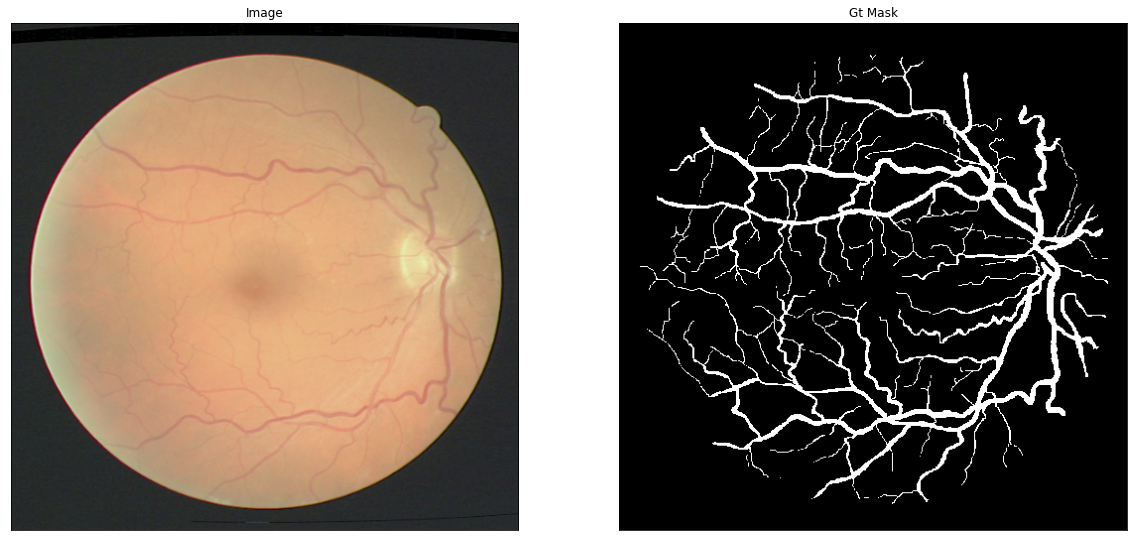

0 1
[0 1]


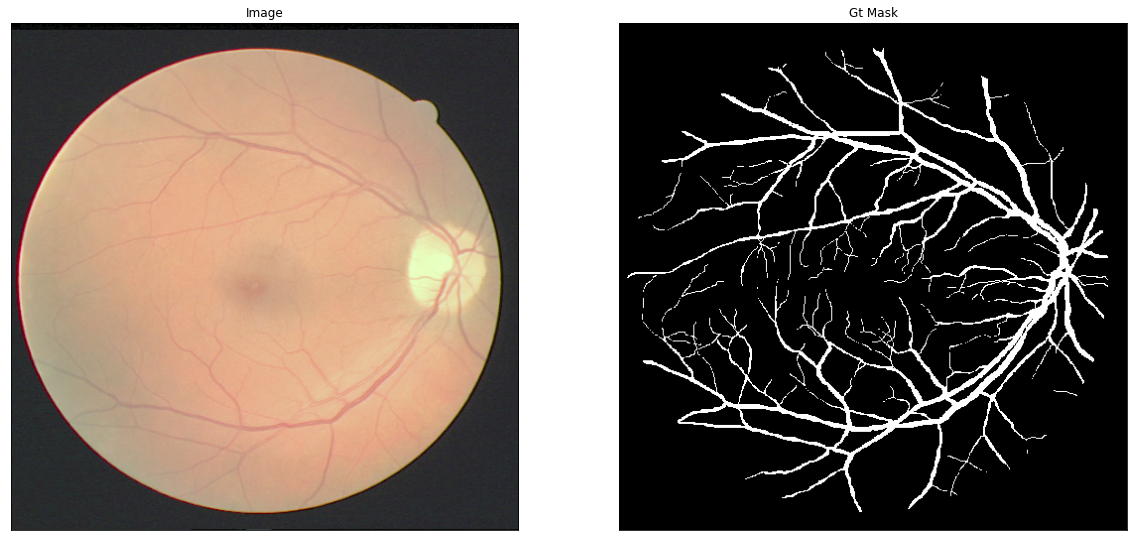

In [135]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [136]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'resnet50'
n_classes  = 1 
activation = 'sigmoid' 
model5 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model5.summary(line_length=110)

Model: "model_1"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
data (InputLayer)                   [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
bn_data (BatchNormalization)        (None, None, None, 3)   9            data[0][0]                           
______________________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)      (None, None, None, 3)   0            bn_data[0][0]                        
______________________________________________________________________________________________________________
conv0 (Conv2D)                      (None, None, None, 64)  9408         zero_padding2d[0][0]  

# Callback : Monitoring Training Progress

In [137]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model5.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [138]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [140]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model5.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
27/27 [==============================] - 15s 259ms/step - loss: 0.7529 - dice_coefficient: 0.1601 - accuracy: 0.4485 - val_loss: 0.7406 - val_dice_coefficient: 0.1424 - val_accuracy: 0.2145

Epoch 00001: val_loss improved from inf to 0.74057, saving model to /kaggle/Models/model5.h5
Epoch 2/250
27/27 [==============================] - 6s 224ms/step - loss: 0.5999 - dice_coefficient: 0.1611 - accuracy: 0.8727 - val_loss: 0.6908 - val_dice_coefficient: 0.1422 - val_accuracy: 0.4766

Epoch 00002: val_loss improved from 0.74057 to 0.69078, saving model to /kaggle/Models/model5.h5
Epoch 3/250
27/27 [==============================] - 6s 224ms/step - loss: 0.5191 - dice_coefficient: 0.1785 - accuracy: 0.9156 - val_loss: 0.6402 - val_dice_coefficient: 0.1404 - val_accuracy: 0.8943

Epoch 00003: val_loss improved from 0.69078 to 0.64016, saving model to /kaggle/Models/model5.h5
Epoch 4/250
27/27 [==============================] - 6s 224ms/step - loss: 0.4508 - dice_coefficient: 0.20

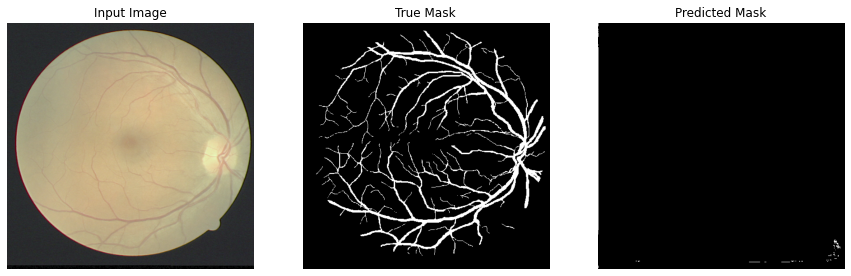


Sample Prediction after epoch 6

Epoch 7/250
27/27 [==============================] - 6s 225ms/step - loss: 0.3541 - dice_coefficient: 0.2662 - accuracy: 0.9460 - val_loss: 0.5372 - val_dice_coefficient: 0.1398 - val_accuracy: 0.9139

Epoch 00007: val_loss did not improve from 0.51746
Epoch 8/250
27/27 [==============================] - 6s 226ms/step - loss: 0.3315 - dice_coefficient: 0.2864 - accuracy: 0.9489 - val_loss: 0.4832 - val_dice_coefficient: 0.1364 - val_accuracy: 0.9024

Epoch 00008: val_loss improved from 0.51746 to 0.48319, saving model to /kaggle/Models/model5.h5
Epoch 9/250
27/27 [==============================] - 6s 223ms/step - loss: 0.3116 - dice_coefficient: 0.3040 - accuracy: 0.9514 - val_loss: 0.4741 - val_dice_coefficient: 0.1321 - val_accuracy: 0.8924

Epoch 00009: val_loss improved from 0.48319 to 0.47409, saving model to /kaggle/Models/model5.h5
Epoch 10/250
27/27 [==============================] - 6s 224ms/step - loss: 0.2943 - dice_coefficient: 0.3191 - acc

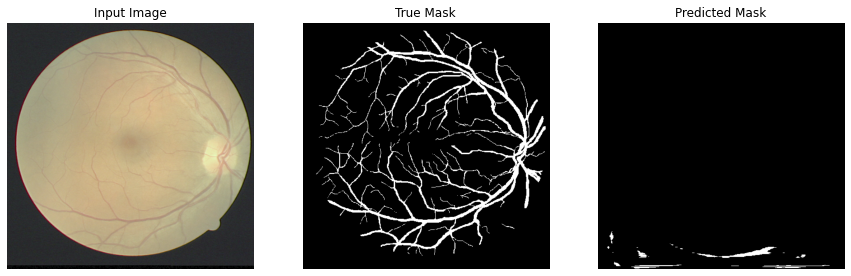


Sample Prediction after epoch 11

Epoch 12/250
27/27 [==============================] - 6s 225ms/step - loss: 0.2650 - dice_coefficient: 0.3471 - accuracy: 0.9558 - val_loss: 0.4055 - val_dice_coefficient: 0.1246 - val_accuracy: 0.9148

Epoch 00012: val_loss improved from 0.44089 to 0.40550, saving model to /kaggle/Models/model5.h5
Epoch 13/250
27/27 [==============================] - 6s 223ms/step - loss: 0.2528 - dice_coefficient: 0.3579 - accuracy: 0.9564 - val_loss: 0.3659 - val_dice_coefficient: 0.1188 - val_accuracy: 0.9161

Epoch 00013: val_loss improved from 0.40550 to 0.36587, saving model to /kaggle/Models/model5.h5
Epoch 14/250
27/27 [==============================] - 6s 225ms/step - loss: 0.2408 - dice_coefficient: 0.3707 - accuracy: 0.9575 - val_loss: 0.3696 - val_dice_coefficient: 0.1226 - val_accuracy: 0.9164

Epoch 00014: val_loss did not improve from 0.36587
Epoch 15/250
27/27 [==============================] - 6s 224ms/step - loss: 0.2293 - dice_coefficient: 0.3855 -

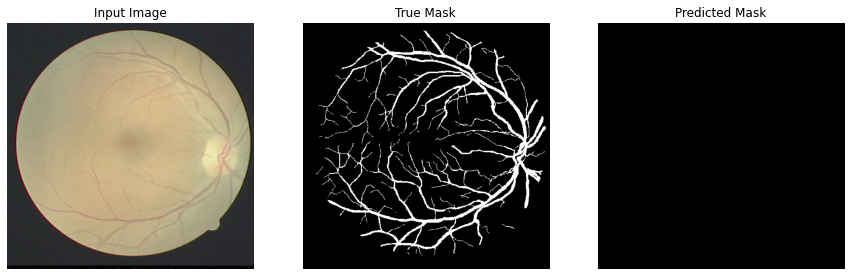


Sample Prediction after epoch 16

Epoch 17/250
27/27 [==============================] - 6s 225ms/step - loss: 0.2042 - dice_coefficient: 0.4163 - accuracy: 0.9617 - val_loss: 0.3240 - val_dice_coefficient: 0.1085 - val_accuracy: 0.9174

Epoch 00017: val_loss improved from 0.34347 to 0.32404, saving model to /kaggle/Models/model5.h5
Epoch 18/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1934 - dice_coefficient: 0.4332 - accuracy: 0.9623 - val_loss: 0.3370 - val_dice_coefficient: 0.1118 - val_accuracy: 0.9162

Epoch 00018: val_loss did not improve from 0.32404
Epoch 19/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1846 - dice_coefficient: 0.4463 - accuracy: 0.9625 - val_loss: 0.4006 - val_dice_coefficient: 0.1346 - val_accuracy: 0.9002

Epoch 00019: val_loss did not improve from 0.32404
Epoch 20/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1769 - dice_coefficient: 0.4577 - accuracy: 0.9621 - val_loss: 0.3237 - val_dic

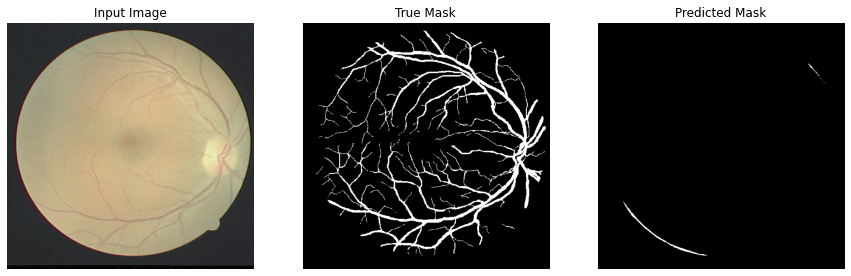


Sample Prediction after epoch 21

Epoch 22/250
27/27 [==============================] - 6s 225ms/step - loss: 0.1615 - dice_coefficient: 0.4878 - accuracy: 0.9621 - val_loss: 0.3022 - val_dice_coefficient: 0.1037 - val_accuracy: 0.9142

Epoch 00022: val_loss did not improve from 0.30104
Epoch 23/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1530 - dice_coefficient: 0.5025 - accuracy: 0.9635 - val_loss: 0.2926 - val_dice_coefficient: 0.1142 - val_accuracy: 0.9167

Epoch 00023: val_loss improved from 0.30104 to 0.29264, saving model to /kaggle/Models/model5.h5
Epoch 24/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1444 - dice_coefficient: 0.5217 - accuracy: 0.9648 - val_loss: 0.2866 - val_dice_coefficient: 0.0911 - val_accuracy: 0.9164

Epoch 00024: val_loss improved from 0.29264 to 0.28661, saving model to /kaggle/Models/model5.h5
Epoch 25/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1366 - dice_coefficient: 0.5415 -

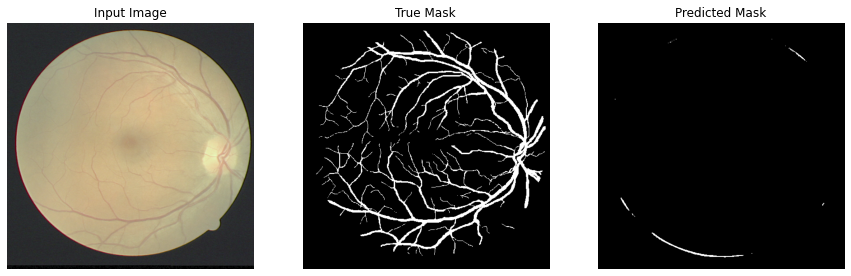


Sample Prediction after epoch 26

Epoch 27/250
27/27 [==============================] - 6s 225ms/step - loss: 0.1253 - dice_coefficient: 0.5706 - accuracy: 0.9665 - val_loss: 0.2810 - val_dice_coefficient: 0.0901 - val_accuracy: 0.9159

Epoch 00027: val_loss improved from 0.28661 to 0.28102, saving model to /kaggle/Models/model5.h5
Epoch 28/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1219 - dice_coefficient: 0.5793 - accuracy: 0.9663 - val_loss: 0.2814 - val_dice_coefficient: 0.0929 - val_accuracy: 0.9160

Epoch 00028: val_loss did not improve from 0.28102
Epoch 29/250
27/27 [==============================] - 6s 225ms/step - loss: 0.1190 - dice_coefficient: 0.5864 - accuracy: 0.9663 - val_loss: 0.2805 - val_dice_coefficient: 0.0958 - val_accuracy: 0.9175

Epoch 00029: val_loss improved from 0.28102 to 0.28046, saving model to /kaggle/Models/model5.h5
Epoch 30/250
27/27 [==============================] - 6s 225ms/step - loss: 0.1147 - dice_coefficient: 0.5991 -

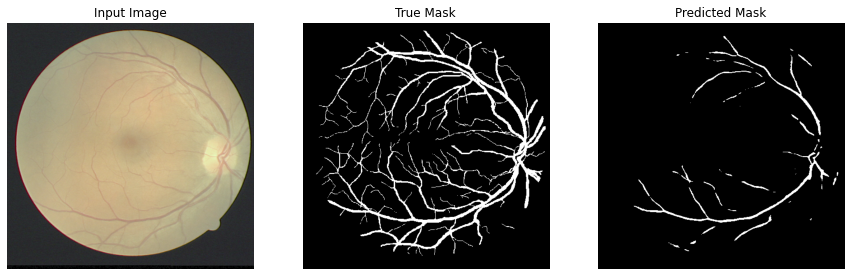


Sample Prediction after epoch 31

Epoch 32/250
27/27 [==============================] - 6s 225ms/step - loss: 0.1060 - dice_coefficient: 0.6256 - accuracy: 0.9686 - val_loss: 0.2195 - val_dice_coefficient: 0.2782 - val_accuracy: 0.9324

Epoch 00032: val_loss improved from 0.22977 to 0.21950, saving model to /kaggle/Models/model5.h5
Epoch 33/250
27/27 [==============================] - 6s 225ms/step - loss: 0.1039 - dice_coefficient: 0.6302 - accuracy: 0.9686 - val_loss: 0.2025 - val_dice_coefficient: 0.3321 - val_accuracy: 0.9365

Epoch 00033: val_loss improved from 0.21950 to 0.20248, saving model to /kaggle/Models/model5.h5
Epoch 34/250
27/27 [==============================] - 6s 224ms/step - loss: 0.1019 - dice_coefficient: 0.6383 - accuracy: 0.9686 - val_loss: 0.1876 - val_dice_coefficient: 0.3660 - val_accuracy: 0.9395

Epoch 00034: val_loss improved from 0.20248 to 0.18762, saving model to /kaggle/Models/model5.h5
Epoch 35/250
27/27 [==============================] - 6s 224ms/st

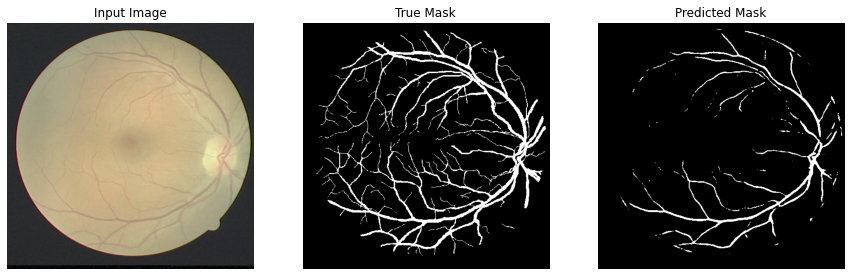


Sample Prediction after epoch 36

Epoch 37/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0935 - dice_coefficient: 0.6655 - accuracy: 0.9703 - val_loss: 0.1601 - val_dice_coefficient: 0.4428 - val_accuracy: 0.9461

Epoch 00037: val_loss improved from 0.16793 to 0.16007, saving model to /kaggle/Models/model5.h5
Epoch 38/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0925 - dice_coefficient: 0.6687 - accuracy: 0.9701 - val_loss: 0.1488 - val_dice_coefficient: 0.4881 - val_accuracy: 0.9505

Epoch 00038: val_loss improved from 0.16007 to 0.14883, saving model to /kaggle/Models/model5.h5
Epoch 39/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0916 - dice_coefficient: 0.6730 - accuracy: 0.9699 - val_loss: 0.1403 - val_dice_coefficient: 0.5183 - val_accuracy: 0.9539

Epoch 00039: val_loss improved from 0.14883 to 0.14025, saving model to /kaggle/Models/model5.h5
Epoch 40/250
27/27 [==============================] - 6s 226ms/st

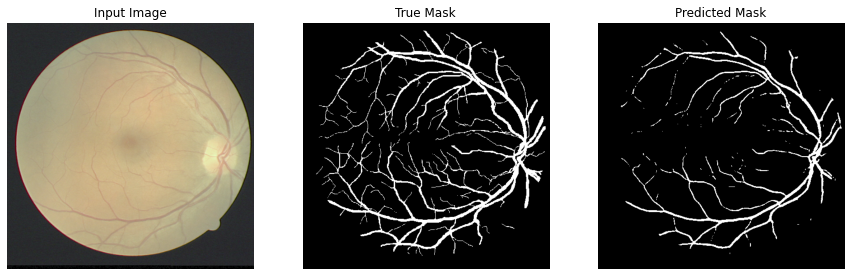


Sample Prediction after epoch 41

Epoch 42/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0853 - dice_coefficient: 0.6923 - accuracy: 0.9714 - val_loss: 0.1284 - val_dice_coefficient: 0.5507 - val_accuracy: 0.9556

Epoch 00042: val_loss improved from 0.13060 to 0.12844, saving model to /kaggle/Models/model5.h5
Epoch 43/250
27/27 [==============================] - 6s 226ms/step - loss: 0.0838 - dice_coefficient: 0.6987 - accuracy: 0.9718 - val_loss: 0.1309 - val_dice_coefficient: 0.5521 - val_accuracy: 0.9549

Epoch 00043: val_loss did not improve from 0.12844
Epoch 44/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0834 - dice_coefficient: 0.7008 - accuracy: 0.9715 - val_loss: 0.1235 - val_dice_coefficient: 0.5713 - val_accuracy: 0.9574

Epoch 00044: val_loss improved from 0.12844 to 0.12346, saving model to /kaggle/Models/model5.h5
Epoch 45/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0826 - dice_coefficient: 0.7030 -

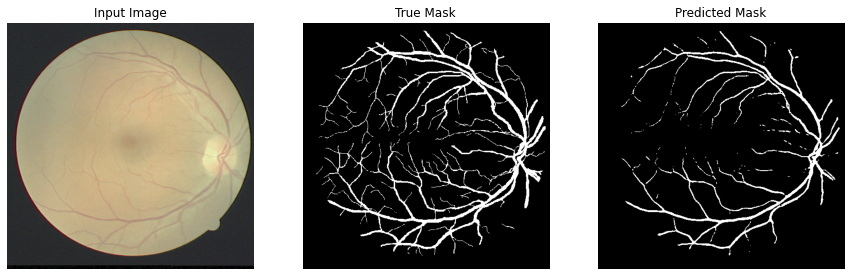


Sample Prediction after epoch 46

Epoch 47/250
27/27 [==============================] - 6s 226ms/step - loss: 0.0794 - dice_coefficient: 0.7139 - accuracy: 0.9723 - val_loss: 0.1173 - val_dice_coefficient: 0.6104 - val_accuracy: 0.9597

Epoch 00047: val_loss improved from 0.11801 to 0.11732, saving model to /kaggle/Models/model5.h5
Epoch 48/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0788 - dice_coefficient: 0.7154 - accuracy: 0.9723 - val_loss: 0.1181 - val_dice_coefficient: 0.6212 - val_accuracy: 0.9596

Epoch 00048: val_loss did not improve from 0.11732
Epoch 49/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0778 - dice_coefficient: 0.7195 - accuracy: 0.9724 - val_loss: 0.1193 - val_dice_coefficient: 0.6215 - val_accuracy: 0.9592

Epoch 00049: val_loss did not improve from 0.11732
Epoch 50/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0760 - dice_coefficient: 0.7242 - accuracy: 0.9730 - val_loss: 0.1189 - val_dic

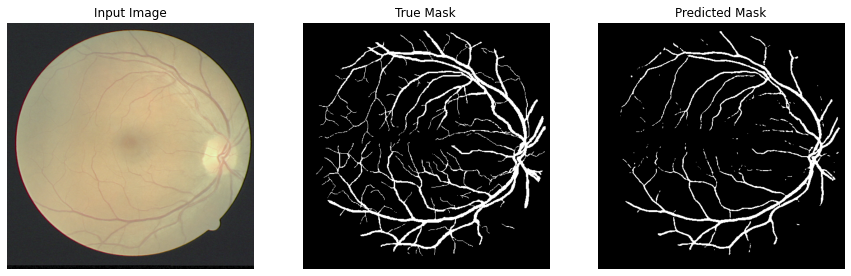


Sample Prediction after epoch 51

Epoch 52/250
27/27 [==============================] - 6s 227ms/step - loss: 0.0740 - dice_coefficient: 0.7306 - accuracy: 0.9735 - val_loss: 0.1179 - val_dice_coefficient: 0.6184 - val_accuracy: 0.9594

Epoch 00052: val_loss did not improve from 0.11732
Epoch 53/250
27/27 [==============================] - 6s 226ms/step - loss: 0.0736 - dice_coefficient: 0.7329 - accuracy: 0.9733 - val_loss: 0.1157 - val_dice_coefficient: 0.6305 - val_accuracy: 0.9603

Epoch 00053: val_loss improved from 0.11732 to 0.11566, saving model to /kaggle/Models/model5.h5
Epoch 54/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0732 - dice_coefficient: 0.7354 - accuracy: 0.9734 - val_loss: 0.1135 - val_dice_coefficient: 0.6437 - val_accuracy: 0.9612

Epoch 00054: val_loss improved from 0.11566 to 0.11349, saving model to /kaggle/Models/model5.h5
Epoch 55/250
27/27 [==============================] - 6s 223ms/step - loss: 0.0727 - dice_coefficient: 0.7370 -

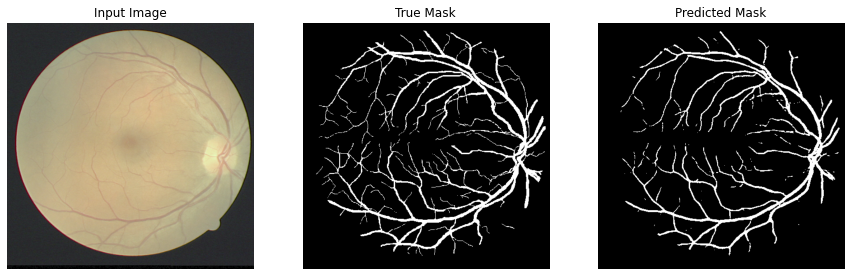


Sample Prediction after epoch 56

Epoch 57/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0717 - dice_coefficient: 0.7405 - accuracy: 0.9733 - val_loss: 0.1076 - val_dice_coefficient: 0.6778 - val_accuracy: 0.9623

Epoch 00057: val_loss improved from 0.10997 to 0.10762, saving model to /kaggle/Models/model5.h5
Epoch 58/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0705 - dice_coefficient: 0.7442 - accuracy: 0.9739 - val_loss: 0.1074 - val_dice_coefficient: 0.6775 - val_accuracy: 0.9618

Epoch 00058: val_loss improved from 0.10762 to 0.10738, saving model to /kaggle/Models/model5.h5
Epoch 59/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0700 - dice_coefficient: 0.7468 - accuracy: 0.9738 - val_loss: 0.1060 - val_dice_coefficient: 0.6795 - val_accuracy: 0.9627

Epoch 00059: val_loss improved from 0.10738 to 0.10597, saving model to /kaggle/Models/model5.h5
Epoch 60/250
27/27 [==============================] - 6s 224ms/st

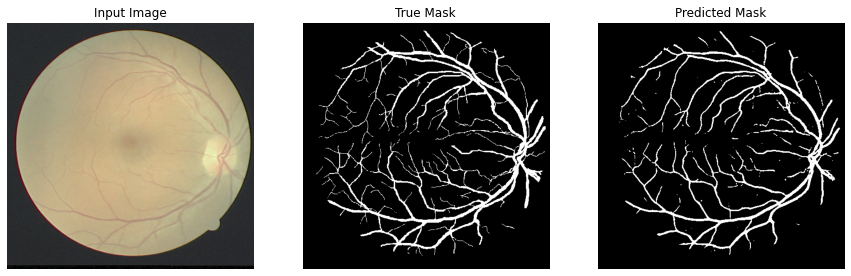


Sample Prediction after epoch 61

Epoch 62/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0680 - dice_coefficient: 0.7541 - accuracy: 0.9742 - val_loss: 0.1054 - val_dice_coefficient: 0.6774 - val_accuracy: 0.9621

Epoch 00062: val_loss improved from 0.10597 to 0.10544, saving model to /kaggle/Models/model5.h5
Epoch 63/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0663 - dice_coefficient: 0.7586 - accuracy: 0.9750 - val_loss: 0.1115 - val_dice_coefficient: 0.6569 - val_accuracy: 0.9603

Epoch 00063: val_loss did not improve from 0.10544
Epoch 64/250
27/27 [==============================] - 6s 223ms/step - loss: 0.0648 - dice_coefficient: 0.7627 - accuracy: 0.9756 - val_loss: 0.1094 - val_dice_coefficient: 0.6645 - val_accuracy: 0.9611

Epoch 00064: val_loss did not improve from 0.10544
Epoch 65/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0639 - dice_coefficient: 0.7651 - accuracy: 0.9758 - val_loss: 0.1080 - val_dic

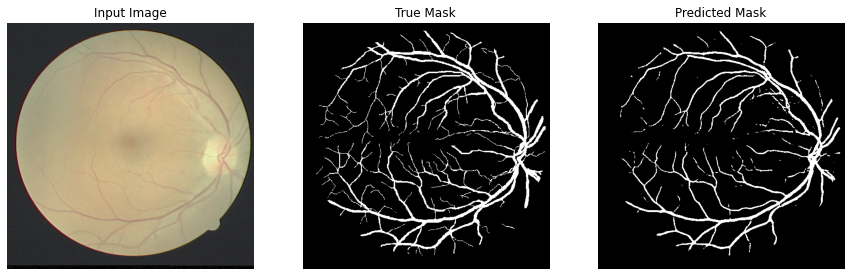


Sample Prediction after epoch 66

Epoch 67/250
27/27 [==============================] - 6s 225ms/step - loss: 0.0624 - dice_coefficient: 0.7711 - accuracy: 0.9762 - val_loss: 0.1086 - val_dice_coefficient: 0.6904 - val_accuracy: 0.9626

Epoch 00067: val_loss did not improve from 0.10544
Epoch 68/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0621 - dice_coefficient: 0.7722 - accuracy: 0.9761 - val_loss: 0.1097 - val_dice_coefficient: 0.6901 - val_accuracy: 0.9624

Epoch 00068: val_loss did not improve from 0.10544
Epoch 69/250
27/27 [==============================] - 6s 223ms/step - loss: 0.0621 - dice_coefficient: 0.7738 - accuracy: 0.9760 - val_loss: 0.1114 - val_dice_coefficient: 0.6832 - val_accuracy: 0.9624

Epoch 00069: val_loss did not improve from 0.10544
Epoch 70/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0608 - dice_coefficient: 0.7767 - accuracy: 0.9766 - val_loss: 0.1075 - val_dice_coefficient: 0.6896 - val_accuracy: 0.9630



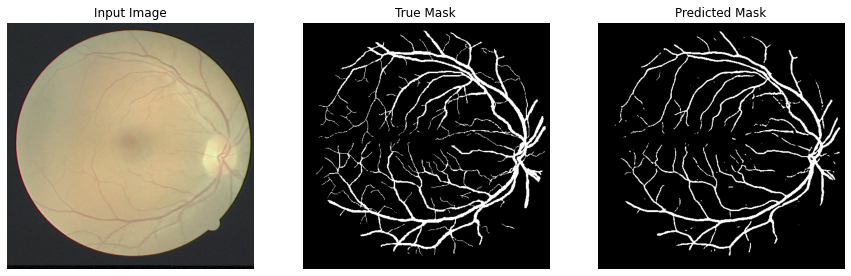


Sample Prediction after epoch 71

Epoch 72/250
27/27 [==============================] - 6s 224ms/step - loss: 0.0597 - dice_coefficient: 0.7813 - accuracy: 0.9768 - val_loss: 0.1088 - val_dice_coefficient: 0.6878 - val_accuracy: 0.9617

Epoch 00072: val_loss did not improve from 0.10544
Epoch 00072: early stopping


In [141]:
from tensorflow.keras.metrics import MeanIoU

# Define a function to calculate the Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)


# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = [dice_coefficient, "accuracy"]

# compile keras model with defined optimozer, loss and metrics
model5.compile(optim, bce, metrics)


history = model5.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [142]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [143]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [144]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [145]:
IMAGE_SIZE = 512
BATCH_SIZE = 4

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [146]:
valid_dataset = test_dataset

In [147]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [148]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model5.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [149]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [150]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   4784655
           1       0.82      0.73      0.77    458225

    accuracy                           0.96   5242880
   macro avg       0.90      0.86      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [151]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6288658430616948


In [152]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7721517959755951


In [153]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7535893869270003


In [154]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.855823565507283


(-0.5, 511.5, 511.5, -0.5)

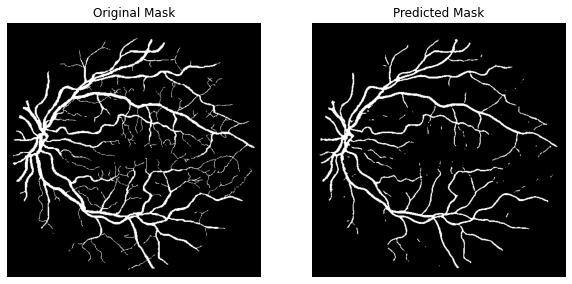

In [155]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model5.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

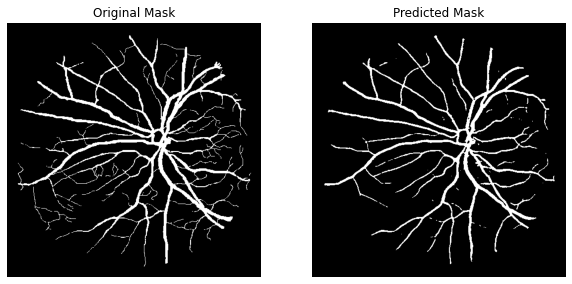

In [156]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model5.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

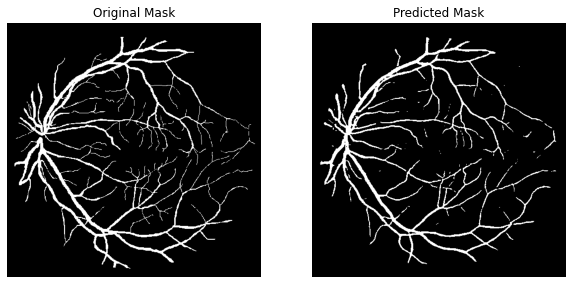

In [157]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model5.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

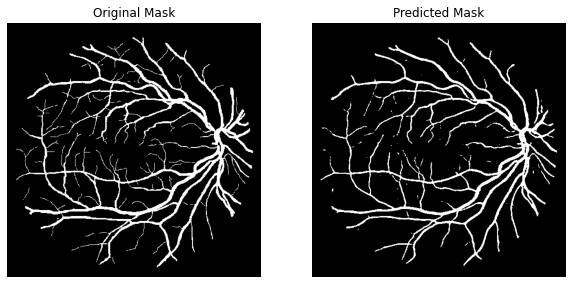

In [158]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model5.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')